<h1><center>Tutorial on Scikit-learn</center></h1>

# CLASSIFICATION

### CREATION AND DISPLAY OF A 2-DIMENSIONAL BALANCED DATASET

https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles


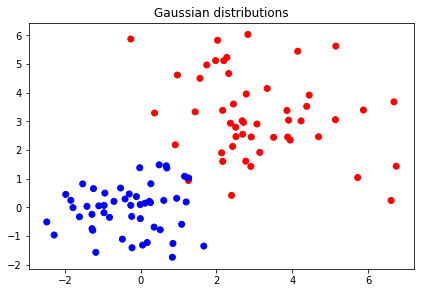

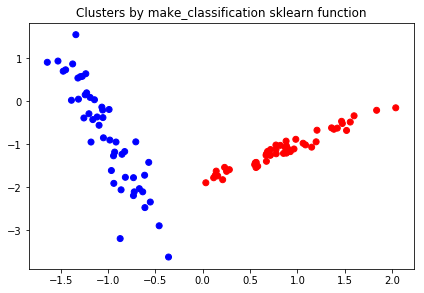

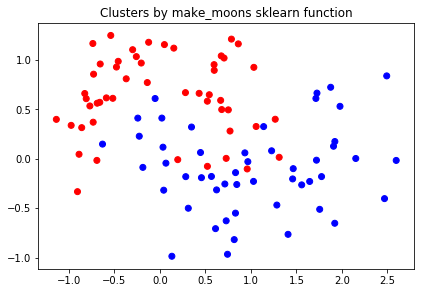

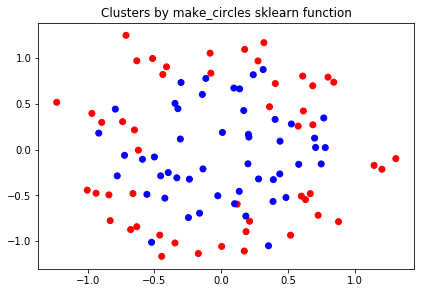

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap
# size of the dataset
n = 100
# negative samples will be red, positive ones will be blue
colormap = ListedColormap(['red','blue'])
# list to store the datasets
dataset_list = []

## from scratch
# definition of the parameters of the normal distributions
mean0 = [3,3]
cov0 = [[2, -1],[-1, 2]]
mean1 = [0,0]
cov1 = [[1, 0],[0, 1]]
# generation of the positive and negative samples
neg_data = np.random.multivariate_normal(mean0, cov0, n//2)
pos_data = np.random.multivariate_normal(mean1, cov1, n//2)
# concatenation of them and creation of the associated labels
X = np.concatenate((neg_data,pos_data),axis=0)
y = np.array((n//2)*[0] + (n//2)*[1])
# display using scatter pyplot function
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colormap)
plt.tight_layout()
plt.title('Gaussian distributions')
plt.show()
dataset_list.append((X,y))

## make classif
from sklearn.datasets import make_classification
# generation of the samples using the make_classification sklearn function
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1)
# display using scatter pyplot function
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colormap)
plt.tight_layout()
plt.title('Clusters by make_classification sklearn function')
plt.show()
dataset_list.append((X,y))

###################################################################
### moons
from sklearn.datasets import make_moons
# generation of the samples using the make_moons sklearn function
X, y = make_moons(noise=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colormap)
plt.tight_layout()
plt.title('Clusters by make_moons sklearn function')
plt.show()
dataset_list.append((X,y))

###################################################################
### circles
from sklearn.datasets import make_circles
# generation of the samples using the make_circles sklearn function
X, y = make_circles(noise=0.2, factor=0.5)
# display using scatter pyplot function
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colormap)
plt.tight_layout()
plt.title('Clusters by make_circles sklearn function')
plt.show()
dataset_list.append((X,y))

### CREATION AND DISPLAY OF THE TRAINING AND THE TESTING SET


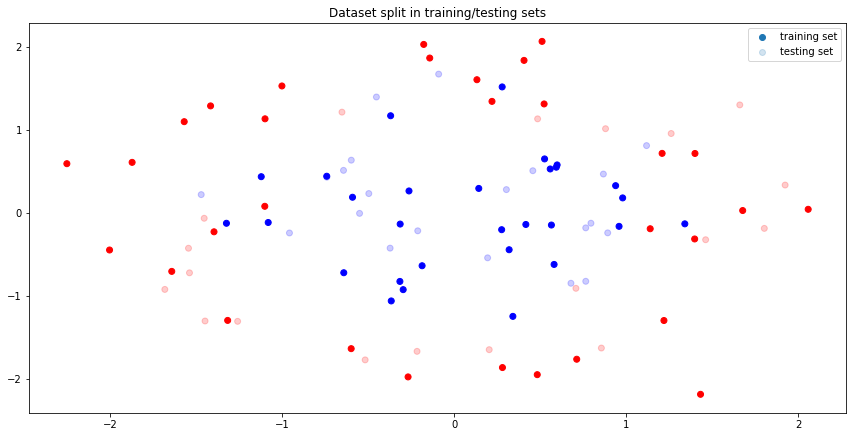

In [3]:
from sklearn.model_selection import train_test_split

# choose here the dataset you want to use
# dataset_list[-1] is the last dataset
X , y = dataset_list[-1]

# scale data for display purposes
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# train_test_split performs a random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

# display the testing set with a lighter color (alpha=0.2)
figure(figsize=(12, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=colormap, label='training set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=colormap, alpha=0.2, label='testing set')
plt.legend()
plt.tight_layout()
plt.title('Dataset split in training/testing sets')
plt.show()

### DEFINITION OF A CLASSIFIER

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [4]:
#from sklearn.utils import all_estimators
from sklearn.utils.testing import all_estimators
estimators = all_estimators()
for name, class_ in estimators:
    print(name)

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis()
]

/home/drougui/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


ARDRegression
AdaBoostClassifier
AdaBoostRegressor
AdditiveChi2Sampler
AffinityPropagation
AgglomerativeClustering
BaggingClassifier
BaggingRegressor
BayesianGaussianMixture
BayesianRidge
BernoulliNB
BernoulliRBM
Binarizer
Birch
CCA
CalibratedClassifierCV
CategoricalNB
CheckingClassifier
ClassifierChain
ColumnTransformer
ComplementNB
CountVectorizer
DBSCAN
DecisionTreeClassifier
DecisionTreeRegressor
DictVectorizer
DictionaryLearning
DummyClassifier
DummyRegressor
ElasticNet
ElasticNetCV
EllipticEnvelope
EmpiricalCovariance
ExtraTreeClassifier
ExtraTreeRegressor
ExtraTreesClassifier
ExtraTreesRegressor
FactorAnalysis
FastICA
FeatureAgglomeration
FeatureHasher
FeatureUnion
FunctionTransformer
GaussianMixture
GaussianNB
GaussianProcessClassifier
GaussianProcessRegressor
GaussianRandomProjection
GenericUnivariateSelect
GradientBoostingClassifier
GradientBoostingRegressor
GraphicalLasso
GraphicalLassoCV
GridSearchCV
HashingVectorizer
HistGradientBoostingClassifier
HistGradientBoostingRegre

/home/drougui/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### TRAIN A CLASSIFIER ON THE TRAINING SET (fit method)

In [5]:
# choose the classifier
clf = classifiers[1]
# train the classifier
clf.fit(X_train, y_train)

SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### USE THE CLASSIFIER TO PREDICT THE LABEL OF THE SAMPLES IN THE TESTING SET (predict method)

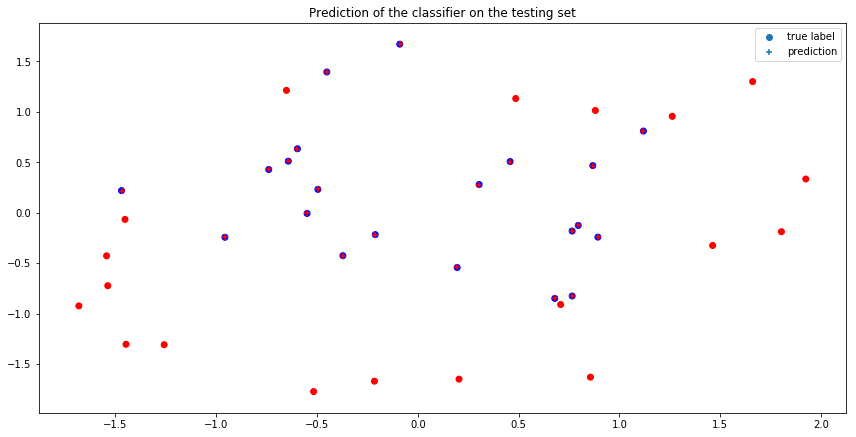

In [6]:
# prediction for each feature vector (sample) in X_test
y_pred = clf.predict(X_test)
# plot the prediction with a '+' and the true class (or label) with a circle
figure(figsize=(12, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=colormap, label='true label')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=colormap, marker='+', label='prediction')
plt.tight_layout()
plt.legend()
plt.title('Prediction of the classifier on the testing set')
plt.show()

### TEST IT ON THE TESTING SET (score method)

In [7]:
# compute the score (opposite of the loss) of the classifier on the testing set
score = clf.score(X_test, y_test)
print('Score: ', score)

Score:  0.475


### DISPLAY THE DECISION FUNCTION / PREDICTION PROBABILITY OF THE CLASSIFIER

The classifier is based on a decision function.


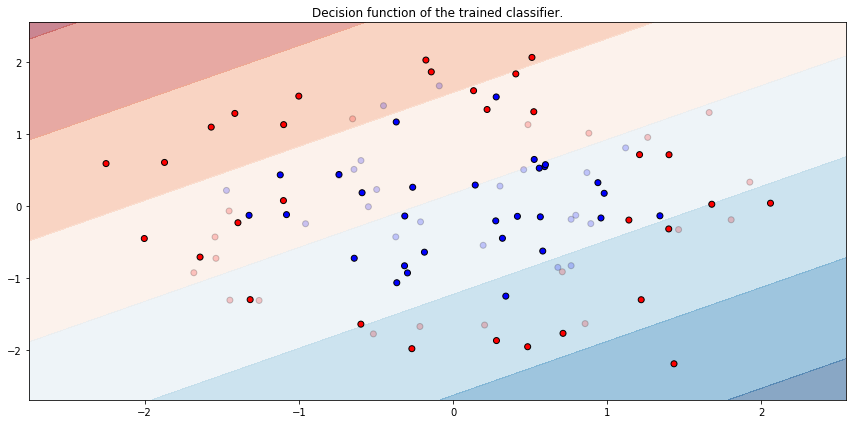

In [8]:
# creation of a mesh
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
# display the decision function (or the prediction probability)
# of the trained classifier by applying it on each value of the mesh. 
cm = plt.cm.RdBu
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    print("The classifier is based on a decision function.")
    title = 'Decision function'
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    print("The classifier is based on a prediction probability.")
    title = 'Prediction probability'
Z = Z.reshape(xx.shape)

# Display the values of the decision function (or pred. probability)
# as colors between red and blue:
#   decision function: red = negative values, blue = positive values
#   prediction probability: red = { values < 0.5 }, blue = { values > 0.5 }
figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, cmap=cm, alpha=.5)

# Display the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=colormap, edgecolors='k')
# Display the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=colormap, alpha=0.2, edgecolors='k')
plt.title(title + ' of the trained classifier.')
plt.tight_layout()
plt.show()

### OPTIMIZE SOME METAPARAMETERS USING CROSS-VALIDATION
https://scikit-learn.org/stable/modules/cross_validation.html?highlight=define%20function%20visualize%20cross%20validation%20behavior

Available meta-parameters:  dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Best parameters:  {'C': 1, 'kernel': 'rbf'}
Score:  0.875


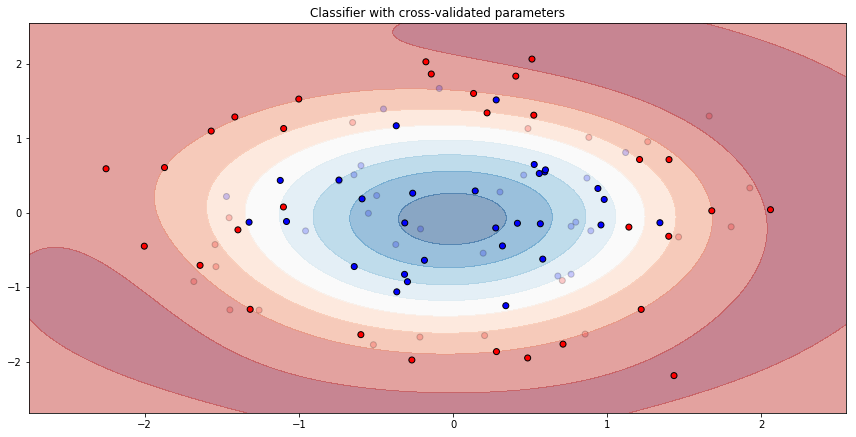

In [9]:
from sklearn.model_selection import GridSearchCV

# Define a classifier
clf = SVC()

# Display the meta-parameters of this classifier
print("Available meta-parameters: ", clf.get_params().keys())

# Select meta-parameters, and propose candidates
#   e.g. meta-parameters 'kernel' and 'C' with candidates 
#   ['linear', 'rbf'] and [0.1,1,10] respectively.
meta_parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1,1,10]
}

# Define the cross-validated classifier
# using 5 folds in sklearn.model_selection.StratifiedKFold
# to create training/validation sets.
# Use the option n_jobs=-1 for parallel computing
# when the script is run outside jupyter notebook.
opt_clf = GridSearchCV(clf, meta_parameters, cv=5)
# Perform cross-validation and select the best classifier
opt_clf.fit(X_train, y_train)
# Best parameters are displayed
print("Best parameters: ", opt_clf.best_params_)

# Display the score
score = opt_clf.score(X_test, y_test)
print("Score: ", score)

# Display the decision function / prediction probability
# of the resulting classifier.
if hasattr(clf, "decision_function"):
    Z = opt_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = opt_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, cmap=cm, alpha=.5)
# Plot the training/testing set (dark/light colors)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=colormap, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=colormap, alpha=0.2, edgecolors='k')
plt.tight_layout()
plt.title('Classifier with cross-validated parameters')
plt.show()

# REGRESSION

### LOAD AND DISPLAY A DATASET
#### BIKE SHARING DATASET 
https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

#### DESCRIPTION:
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered 

Type of each feature: instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


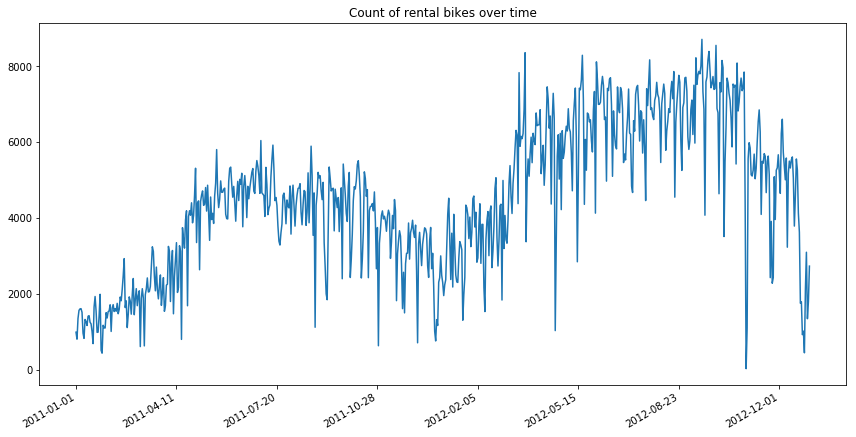

In [39]:
import pandas as pd
from matplotlib.ticker import MultipleLocator

# load dataset (as a pandas dataframe)
df = pd.read_csv('day.csv')
# print columns and associated data types
print("Type of each feature:", df.dtypes)

# Display the target df['cnt'] over time df['dteday']
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot( df['dteday'], df['cnt'])
# formatting plot: Shows the date every 100 days
ax.xaxis.set_major_locator(MultipleLocator(100))
# inclined dates
fig.autofmt_xdate()
plt.tight_layout()
plt.title('Count of rental bikes over time')
plt.show()

### GOAL: PREDICTION OF THE NUMBER OF RENTAL BIKES
#### SELECT THE FEATURES TO BE USED
The features that can help to predict the target should be selected to improve the prediction.
Note that using too many features does not lead to a better fit, and may also make the resulting classifier overfit. However it increases for sure the computation time.

In [40]:
# Select feature names in the list "all_features"
all_features = list(df.columns[:-3])
print('Possible features:', all_features)
# Select target names in the list "all_targets"
all_targets = list(df.columns[-3:])
print('Possible targets:', all_targets)

# Example:
used_features = ['weekday','mnth','yr']
predicted_target = 'cnt'

Possible features: ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
Possible targets: ['casual', 'registered', 'cnt']


### SPLIT THE DATASET INTO TRAINING/TESTING SETS

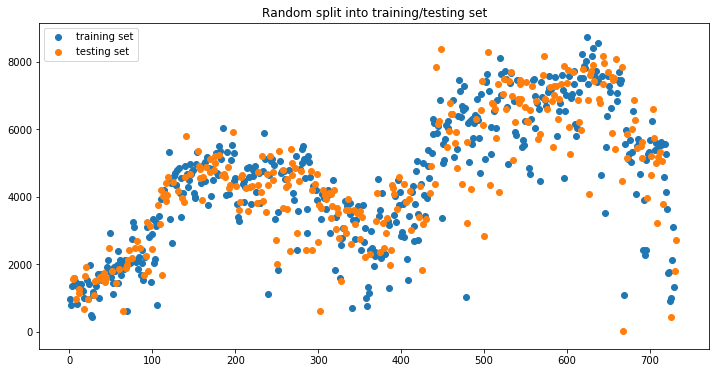

In [41]:
# Select features
# 'instant' is used to display prediction
X = df[['instant']+used_features].to_numpy()
# select target
y = df[[predicted_target]].to_numpy()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

# Remove 'instant' from features
# (used as the time for display)
time_train = X_train[:,0]
X_train = X_train[:,1:]
time_test = X_test[:,0]
X_test = X_test[:,1:]

# Display training and testing samples
figure(figsize=(12, 6))
plt.scatter(time_train, y_train, label='training set')
plt.scatter(time_test, y_test, label='testing set')
plt.legend()
plt.title('Random split into training/testing set')
plt.show()

### DEFINE A PIPELINE
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [42]:
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# Define a Machine Learning pipeline
# i.e. a combination of one (or many) transformations 
# (preprocessing or dimensionality reduction),
# and a final regressor (or classifier)
scaler = preprocessing.StandardScaler()
regr = AdaBoostRegressor(DecisionTreeRegressor())
pipe = Pipeline(steps=[('scaler', scaler),('regr', regr)])

# what are the meta-parameters of this pipeline ?
print('Available meta-parameters:', list(pipe.get_params().keys()))

Available meta-parameters: ['memory', 'steps', 'verbose', 'scaler', 'regr', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'regr__base_estimator__ccp_alpha', 'regr__base_estimator__criterion', 'regr__base_estimator__max_depth', 'regr__base_estimator__max_features', 'regr__base_estimator__max_leaf_nodes', 'regr__base_estimator__min_impurity_decrease', 'regr__base_estimator__min_impurity_split', 'regr__base_estimator__min_samples_leaf', 'regr__base_estimator__min_samples_split', 'regr__base_estimator__min_weight_fraction_leaf', 'regr__base_estimator__presort', 'regr__base_estimator__random_state', 'regr__base_estimator__splitter', 'regr__base_estimator', 'regr__learning_rate', 'regr__loss', 'regr__n_estimators', 'regr__random_state']


### CROSS-VALIDATION OF THE RESULTING REGRESSOR

In [43]:
# Define the meta-parameters to be selected by cross-validation
# as well as the candidates for these meta-parameters
parameters = {'regr__n_estimators': [30,40,50,60,70],
              'regr__loss': ['square','linear','exponential'],
              'regr__base_estimator__max_depth': [30,35,40,45,50]}

# Define the cross-validated regressor
reg = GridSearchCV(pipe, parameters,cv=5, scoring='neg_mean_absolute_error')

### LAUNCH COMPUTATIONS

In [44]:
# train the regressor (this may take some time)
y_train = y_train.ravel()
reg.fit(X_train, y_train)
print('Best parameters:', reg.best_params_)

Best parameters: {'regr__base_estimator__max_depth': 30, 'regr__loss': 'exponential', 'regr__n_estimators': 50}


### EVALUATION OF THE REGRESSOR

Score: -773.338637405806


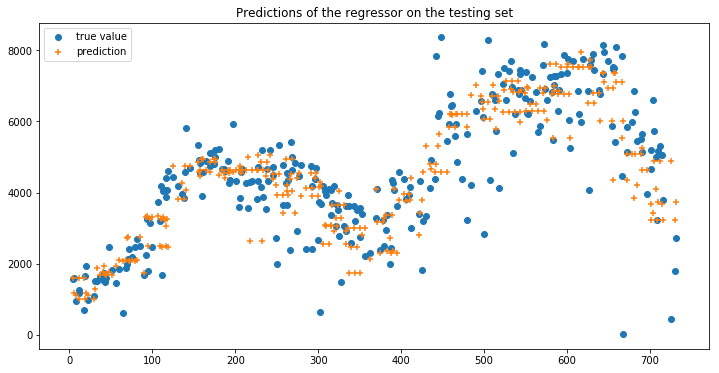

In [45]:
# Compute the score (opposite of the loss function)
# of the regressor on the testing set.
print('Score:', reg.score(X_test,y_test))
# Compute and display predictions and actual values
y_pred = reg.predict(X_test)
figure(figsize=(12, 6))
plt.scatter(time_test, y_test, label='true value')
plt.scatter(time_test, y_pred, label='prediction', marker='+')
plt.legend()
plt.title('Predictions of the regressor on the testing set')
plt.show()

### FEATURE SELECTION METHODS CAN ALSO BE APPLIED
https://scikit-learn.org/stable/modules/feature_selection.html

In [51]:
from sklearn.feature_selection import SelectKBest, f_regression
X = df[['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']].to_numpy()
y = df[[predicted_target]].to_numpy()

#X_new = SelectKBest(f_regression, k=3).fit_transform(X, y)
#print(X_new)
y.ravel()
skb = SelectKBest(f_regression, k=3).fit(X, y)
print(skb.scores_)

[476.81073992 143.96765259 344.89058554  62.00462455   3.42144104
   3.33109137   2.73674228  70.72929783 473.47171053 482.45431053
   7.46194     42.43784159]


/home/drougui/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
from sklearn.feature_selection import SelectKBest, f_regression
X = df[['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']].to_numpy()
# select target
y = df[[predicted_target]].to_numpy()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
# Remove 'instant' from features
# (used as the time for display)
time_train = X_train[:,0]
X_train = X_train[:,1:]
time_test = X_test[:,0]
X_test = X_test[:,1:]


pipe = Pipeline(steps=[('feature_selection', SelectKBest(f_regression)),('scaler', scaler),('regr', regr)])
print('Available meta-parameters:', list(pipe.get_params().keys()))

parameters = {'regr__n_estimators': [40,50,60],
              'regr__loss': ['square','linear','exponential'],
              'regr__base_estimator__max_depth': [30,40,50],
              'feature_selection__k': [3,4,5,6,7]
             }

# Define the cross-validated regressor
reg = GridSearchCV(pipe, parameters,cv=5, scoring='neg_mean_absolute_error')
y_train = y_train.ravel()
reg.fit(X_train, y_train)
print('Best parameters:', reg.best_params_)

Available meta-parameters: ['memory', 'steps', 'verbose', 'feature_selection', 'scaler', 'regr', 'feature_selection__k', 'feature_selection__score_func', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'regr__base_estimator__ccp_alpha', 'regr__base_estimator__criterion', 'regr__base_estimator__max_depth', 'regr__base_estimator__max_features', 'regr__base_estimator__max_leaf_nodes', 'regr__base_estimator__min_impurity_decrease', 'regr__base_estimator__min_impurity_split', 'regr__base_estimator__min_samples_leaf', 'regr__base_estimator__min_samples_split', 'regr__base_estimator__min_weight_fraction_leaf', 'regr__base_estimator__presort', 'regr__base_estimator__random_state', 'regr__base_estimator__splitter', 'regr__base_estimator', 'regr__learning_rate', 'regr__loss', 'regr__n_estimators', 'regr__random_state']
Best parameters: {'feature_selection__k': 7, 'regr__base_estimator__max_depth': 30, 'regr__loss': 'exponential', 'regr__n_estimators': 50}


Score: -543.4948805460751


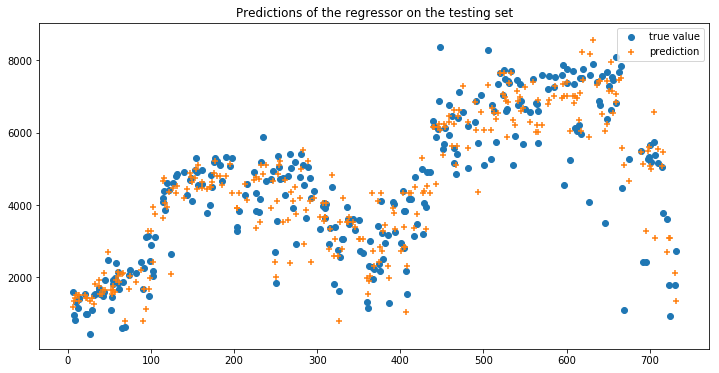

In [53]:
# Compute the score (opposite of the loss function)
# of the regressor on the testing set.
print('Score:', reg.score(X_test,y_test))
# Compute and display predictions and actual values
y_pred = reg.predict(X_test)
figure(figsize=(12, 6))
plt.scatter(time_test, y_test, label='true value')
plt.scatter(time_test, y_pred, label='prediction', marker='+')
plt.legend()
plt.title('Predictions of the regressor on the testing set')
plt.show()

### ENCODE SEASONALITY
When encoding cyclic data by $i \in \{1,2,\ldots, n\}$, the algorithm lacks the information that the last element is close to the first one. For instance, by encoding the days of the week (Monday, Tuesday, ..., Sunday) by $\{1,\ldots,7\}$, Monday is close to Tuesday but far from Sunday. 

A first idea, called One-Hot-Encoding, consists in using the function $F: \{1,2,\ldots,n\} \rightarrow \mathbb{R}^n$ such that $\forall i \{ 1, \ldots, n \}$, $\big(F(i)\big)_{i} = 1$ and $\forall j\neq i$, $\big(F(i)\big)_j = 0$. In this way, we have $\big\lVert F(i) - F(j) \big\rVert = 1$ if $j\neq i$.

There are at least two issues with One-Hot-Encoding. Firstly, it increases the dimension of the feature vector (so it increases the computation time and favors overfitting). Secondly, all days are considered to be at the same distance from each other.

Then, how to represent cyclic data? In two dimension on a circle!

Different values of feature 'weekday': [6 0 1 2 3 4 5]
new features: ['mnth', 'yr', 'sin_weekday', 'cos_weekday']
Best parameters: {'regr__base_estimator__max_depth': 45, 'regr__loss': 'square', 'regr__n_estimators': 30}
Score: -904.4688686737302


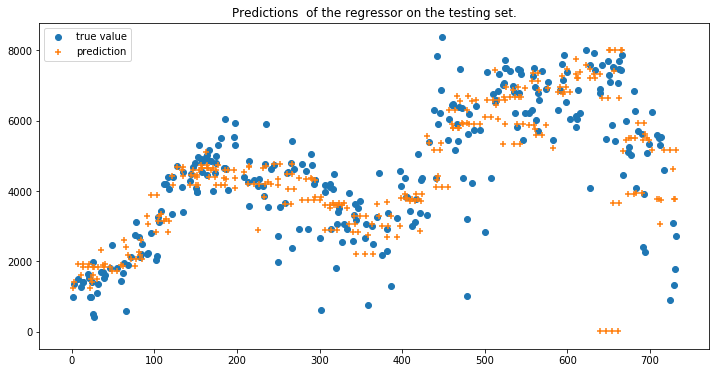

In [46]:
import math
print("Different values of feature 'weekday':", df['weekday'].unique())

# WHY AXIS=1??
# Creation of new features
df['sin_weekday'] = df['weekday'].apply(lambda x: math.sin(2*math.pi*float(x)/7))
df['cos_weekday'] = df['weekday'].apply(lambda x: math.cos(2*math.pi*float(x)/7))

# Update the used features
new_features = [f for f in used_features]
new_features.remove('weekday')
new_features.append('sin_weekday')
new_features.append('cos_weekday')
print('new features:', new_features)

# Split the dataset into training and testing set
# 'instant' is used to display prediction
X = df[['instant']+new_features].to_numpy()
y = df[[predicted_target]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
time_train = X_train[:,0]
X_train = X_train[:,1:]
time_test = X_test[:,0]
X_test = X_test[:,1:]

# Train the regressor
y_train = y_train.ravel()
reg.fit(X_train, y_train)
print('Best parameters:', reg.best_params_)

# Predictions evaluation
print('Score:', reg.score(X_test,y_test))
y_pred = reg.predict(X_test)

# Display the prediction
figure(figsize=(12, 6))
plt.scatter(time_test, y_test, label='true value')
plt.scatter(time_test, y_pred, label='prediction', marker='+')
plt.legend()
plt.title('Predictions  of the regressor on the testing set.') 
plt.show()

### NOW USE THE PAST TO PREDICT THE FUTURE
#### SPLIT THE DATASET

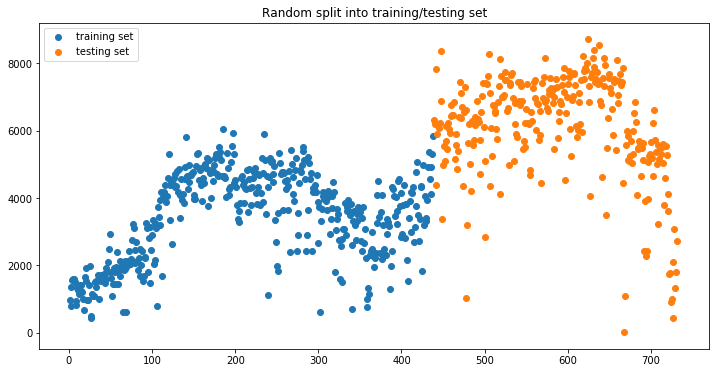

In [47]:
# In practice, evaluation (testing) should be done on the future
# and then optimization (training) on the past.
# Split the dataset into training and testing set
# 'instant' is used to display prediction
test_size=.4
time_index = math.floor((1-test_size)*X.shape[0])
X_train, y_train = X[:time_index,:], y[:time_index]
X_test, y_test = X[time_index:,:], y[time_index:]

# Remove 'instant' from features
# (used as the time for display)
time_train = X_train[:,0]
X_train = X_train[:,1:]
time_test = X_test[:,0]
X_test = X_test[:,1:]

# Display training and testing samples
figure(figsize=(12, 6))
plt.scatter(time_train, y_train, label='training set')
plt.scatter(time_test, y_test, label='testing set')
plt.legend()
plt.title('Random split into training/testing set')
plt.show()

### TRAIN AND TEST THE REGRESSOR

Best parameters: {'regr__base_estimator__max_depth': 30, 'regr__loss': 'linear', 'regr__n_estimators': 30}
Score: -2276.942576479266


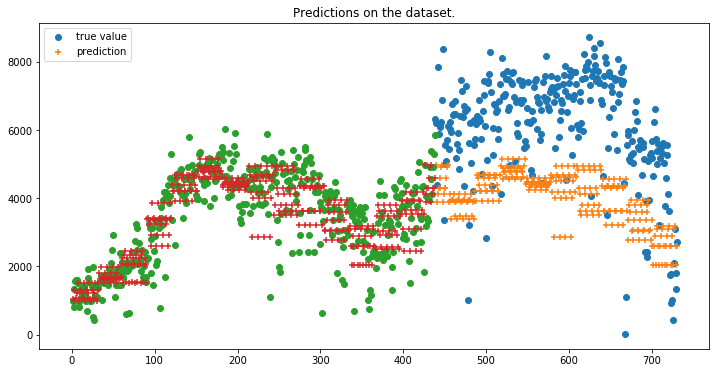

In [48]:
# Train the regressor
y_train = y_train.ravel()
reg.fit(X_train, y_train)
print('Best parameters:', reg.best_params_)

# Predictions evaluation
print('Score:', reg.score(X_test,y_test))
y_pred = reg.predict(X_test)

# Display the prediction
figure(figsize=(12, 6))
plt.scatter(time_test, y_test, label='true value')
plt.scatter(time_test, y_pred, label='prediction', marker='+')
# also on the training set
y_pred_train = reg.predict(X_train)
plt.scatter(time_train, y_train)
plt.scatter(time_train, y_pred_train, marker='+')

plt.legend()
plt.title('Predictions on the dataset.') 
plt.show()

### CONCLUSION
The non-stationarity of the data causes this significant drop in performance: the prediction task is clearly harder.

## COMPUTE AN ESTIMATOR (CLASSIFIER/REGRESSOR) 
#### with the dataset of your choice with the dataset of your choice https://archive.ics.uci.edu/ml/datasets.php

- define the task (classification/regression, candidate features, target, ...)
- load and preprocessing with pandas
- display with matplotlib.pyplot
- supervised learning with scikit-learn